## Imports

Import the necessary libraries to run the notebook.

In [2]:
import requests
from datetime import datetime
from IPython.display import Image

## Hexadecimal

#### Retrieve Block Number from RSK Node

Use the `requests` library to send a JSON-RPC request to a RSK node at the given URL. Retrieve the response and parse it into a JSON object.

In [ ]:
url='https://public-node.rsk.co'
data = {"jsonrpc":"2.0","method":"eth_blockNumber","params":[],"id":1}
response = requests.post(url, json=data)
data=response.json()

In [ ]:
block_number=data.get('result')
block_number

'0x4e07d0'

#### Convert Block Number to Decimal
Take the `block_number` variable, which is a hexadecimal number, and convert it to a decimal number.

In [ ]:
decimal_number = int(block_number, 16)
decimal_number

5113808

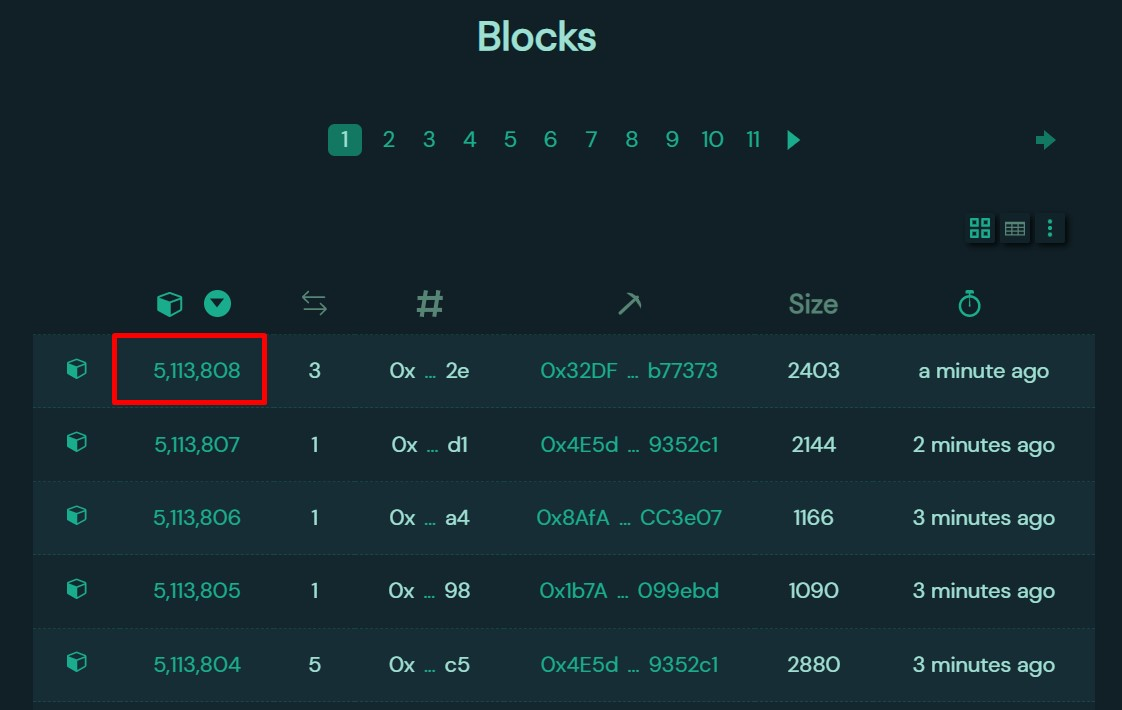

In [ ]:
Image(filename='./images/blocks_rsk.jpg') 

## Checksum

## Checksum Encoding
Define a function called `checksum_encode` which takes a 20-byte binary address as input and returns a checksum-encoded address. We also define a function called `test` which takes a hex address string as input and checks if the checksum-encoded address matches the expected address. If it does not match, it will return the checksum-encoded address.

Attribution: 
*Source code: https://github.com/ethereum/EIPs/blob/master/EIPS/eip-55.md*
*Author: Vitalik Buterin*

In [ ]:
!pip3 install eth-hash
!pip3 install eth-abi
!pip3 install eth-account
!pip3 install eth-keys
!pip3 install eth-utils
!pip3 install rlp
import eth_utils


def checksum_encode(addr): # Takes a 20-byte binary address as input
    hex_addr = addr.hex()
    checksummed_buffer = ""

    # Treat the hex address as ascii/utf-8 for keccak256 hashing
    hashed_address = eth_utils.keccak(text=hex_addr).hex()

    # Iterate over each character in the hex address
    for nibble_index, character in enumerate(hex_addr):

        if character in "0123456789":
            # We can't upper-case the decimal digits
            checksummed_buffer += character
        elif character in "abcdef":
            # Check if the corresponding hex digit (nibble) in the hash is 8 or higher
            hashed_address_nibble = int(hashed_address[nibble_index], 16)
            if hashed_address_nibble > 7:
                checksummed_buffer += character.upper()
            else:
                checksummed_buffer += character
        else:
            raise eth_utils.ValidationError(
                f"Unrecognized hex character {character!r} at position {nibble_index}"
            )

    return "0x" + checksummed_buffer

def test(addr_str):
    addr_bytes = eth_utils.to_bytes(hexstr=addr_str)
    checksum_encoded = checksum_encode(addr_bytes)
    try:
      assert checksum_encoded == addr_str, f"{checksum_encoded} != expected {addr_str}"
      print ("checksum ok")
    except AssertionError:
      return checksum_encoded

In [8]:
test ("0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5")

'0x95222290DD7278Aa3Ddd389Cc1E1d165CC4BAfe5'

In [9]:
test ("0x95222290DD7278Aa3Ddd389Cc1E1d165CC4BAfe5")

checksum ok


## Unix timestamp

Convert a given timestamp to a date in UTC format. 

In [3]:
tm= 1678301971
print(datetime.utcfromtimestamp(tm))

2023-03-08 18:59:31
